In [42]:
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten

In [43]:
from keras.datasets import mnist

In [44]:
from keras.utils import to_categorical

In [45]:
import numpy as np

In [46]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [47]:
x_train.shape

(60000, 28, 28)

In [48]:
y_train.shape

(60000,)

In [49]:
x_test.shape

(10000, 28, 28)

In [50]:
y_train = to_categorical(y_train, num_classes=10)

In [51]:
x_train = np.reshape(x_train, (-1, 784))
print(x_train.shape)

(60000, 784)


In [52]:
x_test = np.reshape(x_test, (-1, 784))
print(x_test.shape)

(10000, 784)


In [53]:
y_test = to_categorical(y_test, num_classes=10)

In [54]:
y_train.shape, y_test.shape

((60000, 10), (10000, 10))

In [56]:
img_size = 28*28
output_size = y_train.shape[1]

In [57]:
model = Sequential()

model.add(Dense(output_size, input_shape=(img_size,), activation='softmax'))

In [58]:
model.compile(loss='categorical_crossentropy',
             optimizer='rmsprop',
             metrics=['accuracy'])

In [59]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [60]:
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 4s - loss: 6.3024 - acc: 0.5981 - val_loss: 3.6631 - val_acc: 0.7624

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline

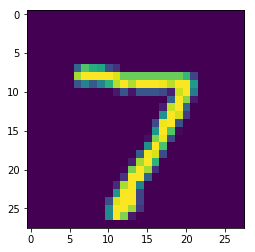

In [63]:
plt.imshow(x_test[0].reshape(28,28))

In [64]:
y_test[0]

array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.])

In [66]:
pred = np.expand_dims(x_test[0], axis=0)

In [67]:
pred.shape

(1, 784)

In [68]:
model.predict(pred, batch_size=1, verbose=1)

1/1 [==============================] - 0s


array([[  0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.12952154e-18,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          1.00000000e+00]], dtype=float32)

In [69]:
model.predict_classes(pred)

1/1 [==============================] - 0s


array([9], dtype=int64)